In [1]:
%load_ext autoreload
%autoreload 2

import comet_ml
from comet_ml import Experiment
import roboscientist
from roboscientist import datasets
from roboscientist.datasets import equations_settings
import sympy as snp
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from roboscientist.datasets.equations_utils import expr_to_tree

## Generate equation

In [2]:
np.random.seed(1389)
equations = datasets.generate_polynomial_dataset(dataset_size=10, n_samples_init=100, nodes=15, n_variables=2)

In [3]:
len(equations)

10

In [4]:
equations[0]

Add(Mul(Symbol('x1'), Add(Symbol('x0'), Symbol('x1'), Integer(3))), Integer(1))

In [5]:
equations[0].expr

x1*(x0 + x1 + 3) + 1

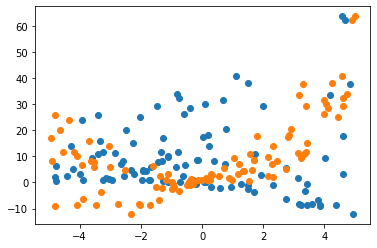

In [6]:
plt.scatter(equations[0].dataset[0][:, 0], equations[0].dataset[1]); 
plt.scatter(equations[0].dataset[0][:, 1], equations[0].dataset[1]);

In [7]:
print(equations[0].postfix, equations[0].variables)

([1.0, 'x1', 3.0, 'x0', 'x1', 'Add', 'Mul', 'Add'], [0, 0, 0, 0, 0, 3, 2, 2]) [x0, x1]


In [8]:
D, _ = expr_to_tree(equations[0]._expr)

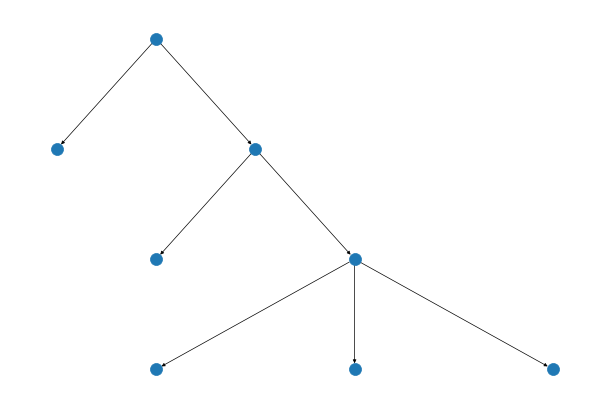

In [9]:
plt.figure(figsize=(12, 8), dpi=50)
pos = graphviz_layout(D, prog="dot")
nx.draw(D, pos)
plt.show()

## Brute force

In [10]:
from roboscientist.models import BruteForceSolver
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [11]:
experiment = Experiment(project_name="RoboScientist", workspace="SchattenGenie")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/schattengenie/roboscientist/393cba9ffc4440ceba2914ee05297deb



In [12]:
from roboscientist.logger import CometLogger

In [13]:
logger = CometLogger(experiment=experiment)

In [14]:
solver = BruteForceSolver(logger=logger, max_time=100)

In [15]:
candidate_equations = solver.solve(equations, epochs=1)

2853it [01:40, 28.52it/s]
3002it [01:40, 30.02it/s]
3126it [01:40, 31.26it/s]
2976it [01:40, 29.75it/s]
3097it [01:40, 30.96it/s]
3042it [01:40, 30.41it/s]
2561it [01:40, 25.60it/s]
2796it [01:39, 27.96it/s]
2630it [01:40, 26.30it/s]
3186it [01:40, 31.84it/s]


## Plot residuals and QQ-plot

In [16]:
equation = equations[0]
best_candidate_equation = candidate_equations[0]

In [17]:
X, y = equation.dataset
y_hat = np.real(best_candidate_equation(X + 0j))

residuals = y_hat - y

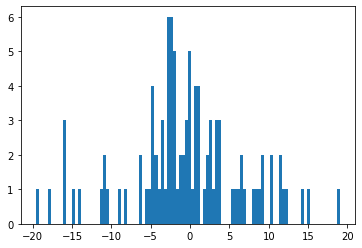

In [18]:
plt.hist(residuals, bins=100);

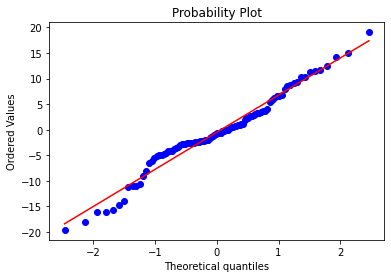

In [19]:
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

## Plot residuals and QQ-plot on test dataset

In [20]:
X_test = np.random.randn(10000, len(equation.variables))
y_test = equation(X_test)

In [21]:
y_test_hat = np.real(best_candidate_equation(X_test + 0j))

residuals = y_test_hat - y_test

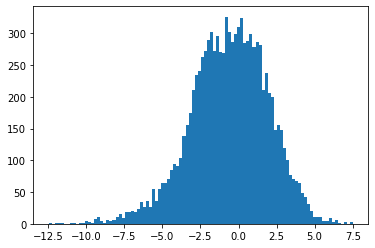

In [22]:
plt.hist(residuals, bins=100);

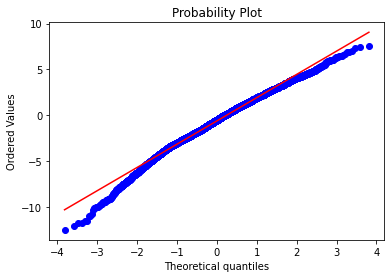

In [23]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

## Let's also take a look on imag part

In [24]:
y_test_hat_imag = np.imag(best_candidate_equation(X_test + 0j))

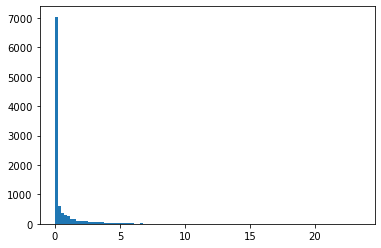

In [25]:
plt.hist(y_test_hat_imag, bins=100);

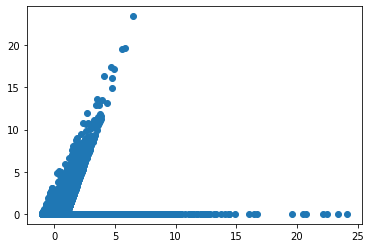

In [26]:
plt.scatter(y_test_hat, y_test_hat_imag)

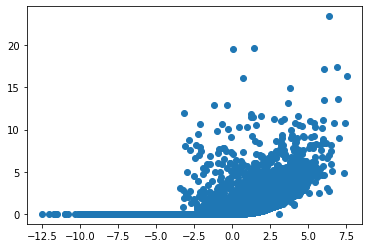

In [27]:
plt.scatter(residuals, y_test_hat_imag)